<font color=Blue> input the image same as last hw <font>



In [1]:
from PIL import Image
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 


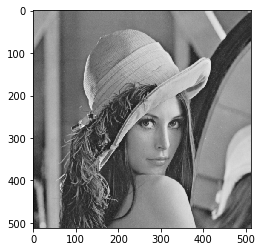

In [25]:
img = Image.open('lena.bmp') 
image_array = np.array(img)
plt.imshow(img)

## <font color=Blue>A binary image (threshold at 128) <font>
 Set the treshold as 128, means gray graph with pixels under 128 are wirtten as 0(black) <br>
   and pixels with value higher or equal to 128 are written 255(white)


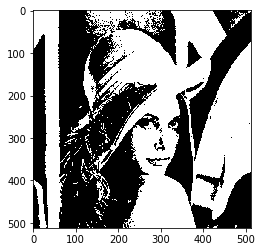

In [398]:
bi_array=image_array.copy()
bi_array[bi_array<128]=0
bi_array[bi_array>=128]=255
plt.imshow(Image.fromarray(bi_array))


# <font color=Blue>a histogram <font>
 Set up a list of len 256 
  each number can represent the frequence of each color palettes 
    

<BarContainer object of 256 artists>

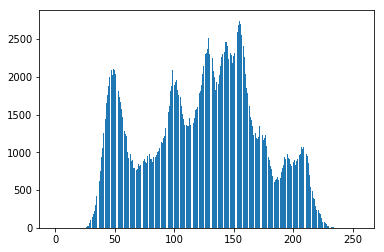

In [34]:
his_l=[0]*256
h,w= image_array.shape
for i in range(h):
    for j in range(w):
        his_l[image_array[i][j]]+=1
plt.bar(range(256),his_l)
        

  
# <font color=Blue>connected components (regions with + at centroid, bounding box) <font>
### First change the array into 0/1 format  <br>And I choice the four connected and the forth algorithum 
    
    
    
 
    

In [400]:
lx=[] 
h,w=bi_array.shape
bi_array[bi_array==255]=1




## set up of test matrix

lx=[] 
h,w=8,8
bi_array=np.random.randint(2, size=(8, 8)) + np.random.randint(2, size=(8, 8))
bi_array[bi_array>=1]=1
bi_array=bi_array.tolist()
bi_array




## set up of the matrix in test book 
lx=[]
h,w=5,5
bi_array=[[1,1,0,1,1],
            [1,1,0,0,1],
            [1,1,1,0,1],
            [0,0,0,0,0],
            [0,1,1,1,1]]



# <font color=Blue> Set a matrix like this <font>
so search from lift to right ,the continue color palette as a block in one line ,
    storage in list format 
![title](1234.png)


In [401]:

# stage ot mean in white and change into itt stage if a black pic is met
state='ot'
count=0
for i in range(h):
    for j in range(w):
        if state=='ot': 
            if bi_array[i][j]==1:
                row_num=i
                col_num=j
                state='itt'
            else:
                pass
        else:
            pass


        if state=='itt':
            if j==w-1:
                stop_col=j
                state='ot'
                count+=1
                #print(row_num,col_num,stop_col)
                lx.append([count,row_num,col_num,stop_col,0])

            if bi_array[i][j]==0:
                assert i==row_num
                stop_col=j-1
                state='ot'
                count+=1
                #print(row_num,col_num,stop_col)
                lx.append([count,row_num,col_num,stop_col,0])
         

print(np.array(lx))

[[   1    0    0   60    0]
 [   2    0  121  122    0]
 [   3    0  126  134    0]
 ...
 [7151  511  423  431    0]
 [7152  511  472  472    0]
 [7153  511  474  476    0]]


## <font color=Blue> the matrix showed above <font >
    some thing different is i set the start col as 0 <br>
    not 1 as the picture download from the text book 
    

In [402]:
def chech_overlap(l1,l2):
    if l2[2]>l1[3]: # 下一行头 在前一行的尾巴 的后面
        return False 
    elif l2[3]<l1[2]: # 下一行的尾 在前一行头的 前面 
        return False 
    else:
        return True 
    
def reset_group_num(last_row_line_num,this_line_st,i,lx): 
    """If overlap then set the min group value to the both group
        if not overlap then add a new group number
    """
    overlaped=0
    for x in range(last_row_line_num,this_line_st):    # blocks of last line      
        overlap=chech_overlap(lx[x],lx[i])
        #print(lx[x],lx[i],overlap)
        if overlap==True:
            lx[i][4]=min(lx[x][4],lx[i][4])
            lx[x][4]=min(lx[x][4],lx[i][4])
            overlaped+=1
    
    if overlaped==0:  # this means this block does not overlap with any of the block in last line 
        pass
    

## up side down search 
    for the first line each give a seperate group number <br>
    when in move into second line then give a group number first <br> 
    and if overlapped  <br>
    replace bigger one by smaller group number <br>
     
    sudu :<br>
    if row_number !=last row :
        new line begin 
        reset blocks contained in line 
    if in line :
        than compare the block with the upper line 
        
        
![title](5678.png)


    set 1,2,3 first 
    set 4 
    and compare 4 to 1,2,3 
    then 4<-1
    then 2<-4(1)
    then 3<-4(1)

        
        

In [403]:

row_num=0
current_group=1
ele_num=0 # how many in last line 
for i in range(len(lx)): # i always means the current line num
    if row_num==lx[i][1]:  # this means in this row       
        if lx[i][1]==0:  # the first line
            lx[i][4]=current_group
            current_group+=1
            ele_num+=1
            
        else:
            current_group=np.array(lx)[:i,4].max()
            current_group+=1
            lx[i][4]=current_group
            reset_group_num(last_row_line_num,this_line_st,i,lx)
            ele_num+=1                   
    else:
        if (row_num +1) != lx[i][1]:
            # this means a empty line
            current_group=np.array(lx)[:i,4].max()
            current_group+=1
            lx[i][4]=current_group
            ele_num+=1
          
        else:    
            current_group=np.array(lx)[:i,4].max()
            current_group+=1
            lx[i][4]=current_group
            row_num=row_num+1  # this means a new line begin 
            this_line_st=i
            last_row_line_num=i-ele_num        
            reset_group_num(last_row_line_num,this_line_st,i,lx) 
            ele_num=1
            
print(np.array(lx))



[[   1    0    0   60    1]
 [   2    0  121  122    2]
 [   3    0  126  134    3]
 ...
 [7151  511  423  431 1185]
 [7152  511  472  472 1202]
 [7153  511  474  476 1187]]


## A down to up search is needed 
    under this situation in the double check
    you find that if it is a shape of V  (if the third line is linked by the upper is not it will not show the same group number )
    so this down to up search is needed
     that when the after line change the upper lines 
     the most upper ones doesnt change 
     
  
      so the mostdown and compare each blcok with the lower line 
      and what the same overlapping change 



In [408]:
n=len(lx)-1
row_num=h-1
e_num=0

while n>=1:
    enter_line=lx[n]
    
    if enter_line[1]==row_num:
        
        if enter_line[1]==h-1: #this is the downmost line 
            e_num+=1
        else:
           
            reset_group_num(this_line_st+1,last_row_line_num+1,n,lx)      
        
            e_num+=1
           
    else:
        if (row_num -1) != enter_line[1]: # this means a empty line 
            pass 
        
        else: # this means a new line begin 

            row_num=row_num-1  # this means a new line begin  
            this_line_st=n
            last_row_line_num=n+e_num   

            reset_group_num(this_line_st+1,last_row_line_num+1,n,lx) #check overlap
            e_num=1
        
        # this means a new line begin

    n-=1
    
print(np.array(lx))


[[   1    0    0   60    1]
 [   2    0  121  122    2]
 [   3    0  126  134    3]
 ...
 [7151  511  423  431 1185]
 [7152  511  472  472 1202]
 [7153  511  474  476 1187]]


In [405]:

cluster_dic={}
for i in range(len(lx)):
    if lx[i][4] in cluster_dic.keys():
        cluster_dic[lx[i][4]]+=lx[i][3]-lx[i][2]+1
    else:
        cluster_dic[lx[i][4]]=lx[i][3]-lx[i][2]+1
cluster_want={k:v for k,v in cluster_dic.items() if v > 500}
clusters=cluster_want.keys()

            
        

In [406]:

cluster_want_center_r={k:[] for k in clusters}
cluster_want_center_c={k:[] for k in clusters}

for i in range(len(lx)):
    if lx[i][4] in clusters:
        for x in range(lx[i][2],lx[i][3]+1):
            cluster_want_center_r[lx[i][4]].append(lx[i][2])
            cluster_want_center_c[lx[i][4]].append(lx[i][3])
            


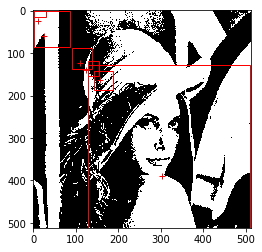

In [407]:
fig,ax = plt.subplots(1)
bi_array=image_array.copy()
bi_array[bi_array<128]=0
bi_array[bi_array>=128]=255
ax.imshow(Image.fromarray(bi_array))
#ax.imshow(img)

import matplotlib.patches as patches
centers=[]
for cls in clusters:
    centers.append((np.mean(cluster_want_center_r[cls]), np.mean(cluster_want_center_c[cls])))
for cls in clusters:
    rect = patches.Rectangle((min(cluster_want_center_c[cls]),min(cluster_want_center_r[cls])),max(cluster_want_center_c[cls])-min(cluster_want_center_c[cls]),max(cluster_want_center_r[cls])-min(cluster_want_center_r[cls]),linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
x,y=zip(*centers)
plt.plot(x,y,'r+')    
plt.show()

In [411]:
print('centers')
centers

centers


[(24.501633808953272, 59.6950767890208),
 (303.0579116450595, 388.6045793255522),
 (124.39264705882353, 140.0828431372549),
 (110.7080745341615, 122.54658385093168),
 (158.00230946882218, 162.62355658198615),
 (11.239597315436242, 23.783221476510068)]

In [410]:
from IPython.display import display_html
display_html("""<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();">Toggle Code</button>""", raw=True)


Toggle Code